In [1]:
import copy as cp
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import sys
sys.path.append('../0_python_modules/')
import extras

In [2]:
def clusters(hc,nids=range(2,11)):
    for h in nids:
        hl=extras.get_hc_dtraj(hc, h)
        print(h, {i:np.where(hl==i)[0].shape[0] for i in np.unique(hl)})
clusters(np.load('saved_furf/hc_permute.npy'))

2 {0: 73751, 1: 53687}
3 {0: 73751, 1: 13540, 2: 40147}
4 {0: 13540, 1: 40147, 2: 73680, 3: 71}
5 {0: 13540, 1: 40147, 2: 73680, 3: 69, 4: 2}
6 {0: 13540, 1: 40147, 2: 69, 3: 2, 4: 1611, 5: 72069}
7 {0: 13540, 1: 40147, 2: 69, 3: 2, 4: 1611, 5: 180, 6: 71889}
8 {0: 13540, 1: 40147, 2: 69, 3: 2, 4: 1611, 5: 180, 6: 2, 7: 71887}
9 {0: 13540, 1: 69, 2: 2, 3: 1611, 4: 180, 5: 2, 6: 71887, 7: 39517, 8: 630}
10 {0: 13540, 1: 69, 2: 2, 3: 1611, 4: 180, 5: 2, 6: 39517, 7: 630, 8: 1258, 9: 70629}


In [2]:
lags = np.arange(5,50+1,5)

In [3]:
vall = np.load('saved_vamp/vamps_all.npy')

In [4]:
vall.shape

(1203, 10)

In [5]:
fsupervised = [ np.load(f'saved_supervised/fimp_{i}.npy') for i in range(5)]
fsupervised = np.mean(fsupervised, axis=0), np.std(fsupervised, axis=0)

In [6]:
fpermute = [[np.load(f'saved_furf/fimp_hlabel{h}_{i}.npy') for i in range(5)] for h in range(2,11)]
fpermute = np.mean(fpermute, axis=1), np.std(fpermute, axis=1)

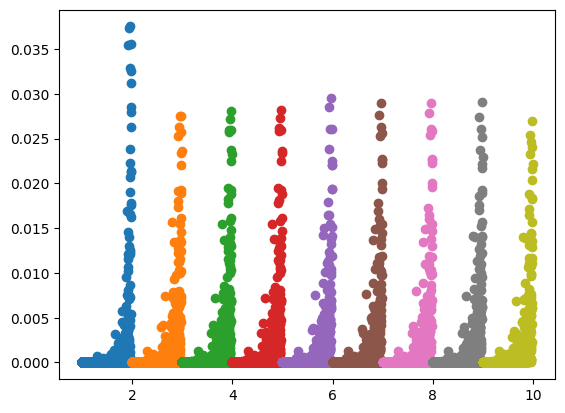

In [10]:
for h in range(2,11):plt.scatter(vall[:,0]+h-2, fpermute[0][h-2])

In [8]:
cmaps = mt.cm.get_cmap('Reds')

/tmp/ipykernel_1817001/4104700905.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmaps = mt.cm.get_cmap('Reds')


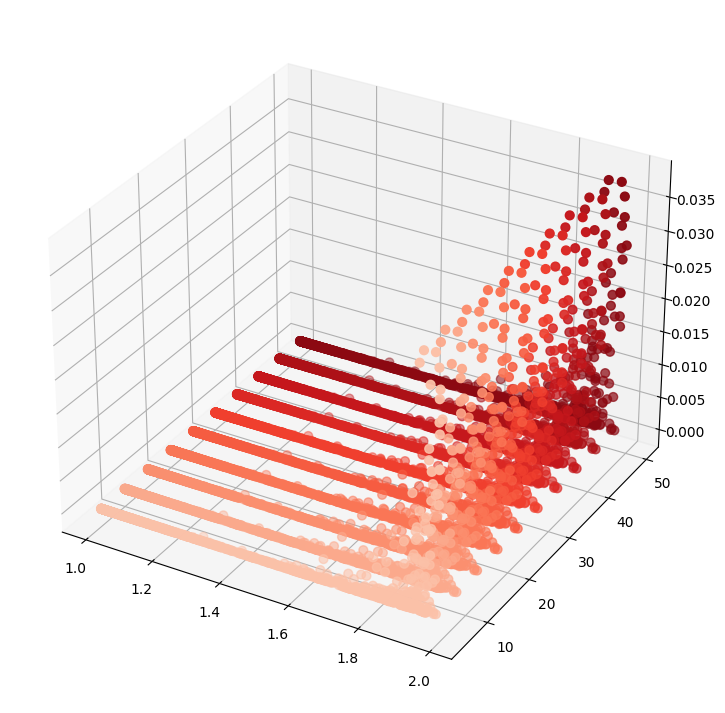

In [13]:
fig = plt.figure(figsize=(9,9))
ax0 = fig.add_subplot(projection='3d')
for i in range(10):ax0.scatter(vall[:,i], [5*(i+1) for j in range(fpermute[0][0].shape[0])], fpermute[0][0],
                               color=cmaps((i+3)/13), s=40)
plt.show()

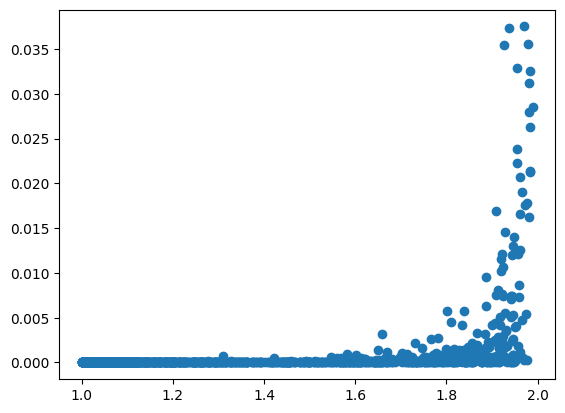

In [19]:
h=2
plt.scatter(vall[:,0], fpermute[0][h-2])

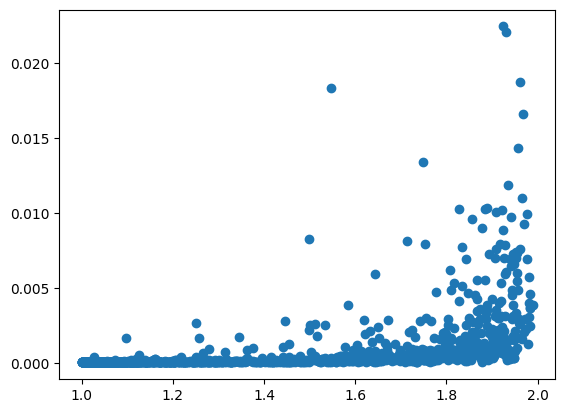

In [20]:
plt.scatter(vall[:,0], fsupervised[0])

In [7]:
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size']=7
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=7
plt.rcParams['ytick.major.width']=2

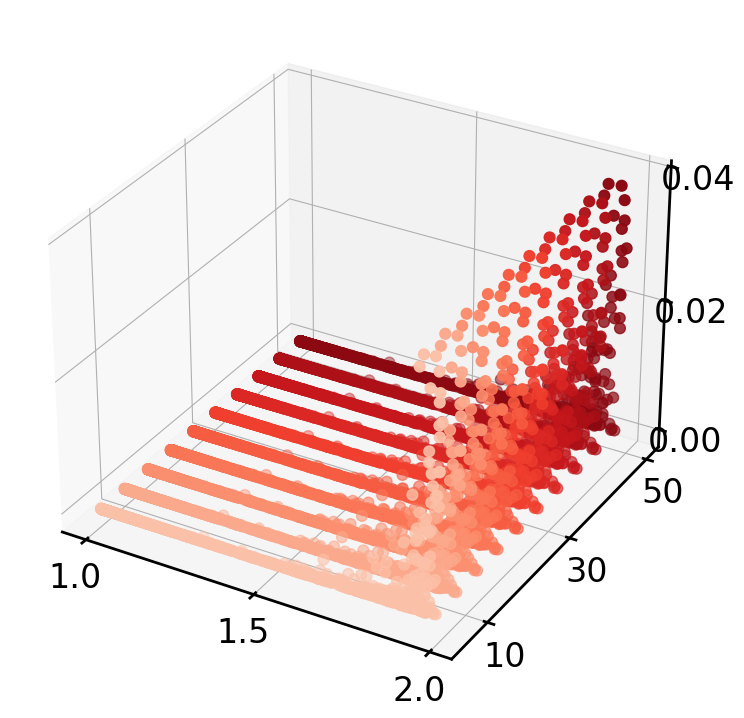

In [12]:
fig = plt.figure(figsize=(9,9))
ax0 = fig.add_subplot(projection='3d')
for i in range(10):ax0.scatter(vall[:,i], [5*(i+1) for j in range(1203)], fpermute[0][0], 
                               color=cmaps((i+3)/13), s=60)
ax0.tick_params(labelsize=24)
ax0.set_xticks([1,1.5,2])
ax0.set_yticks([10,30,50])
ax0.set_zticks([0.0,0.02,0.04])
plt.savefig('plots/vamp2_urf2.pdf')
plt.show()